In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from nltk import word_tokenize, sent_tokenize
import nltk
import random
from IPython.display import display, Markdown, Latex

In [2]:
'''

Definimos la función que agarra palabras al azar de un texto que le pongamos, y cuenta la cantidad de letras de esas 
palabras. La función toma como input la dirección en la que el texto se encuentra guardado, por ejemplo './text_es.txt',
n la cantidad de palabras que agarra, de las cuales elige la que posea el mayor número de letras y la almacena descartando
las otras n-1 palabras, y K el número de veces que queremos que se repita este proceso. 

'''
def Palabras(Text,n,K):
    
    # la variable Text se escribe de la forma './Nombre_del_archivo.txt'
    fic = open(str(Text), "r") #abre el archivo

    lines = []
    for line in fic:
        lines.append(line)
    fic.close()

    N=len(lines)
    
    #cuenta cuantas letras hay en cada palabra del texto y lo almacena en un array
    longitudes = []
    for j in range(N):
        longitud = [len(w)for w in word_tokenize(lines[j]) if w.isalpha()]
        for i in longitud:
            longitudes.append(i)
    
    #Cuenta la cantidad de letras que hay por palabra en el conjunto de n palabras, toma el máximo de estas y lo almacena en un array
    maximos=[]
    for i in range(K):
        temp=[]
        for j in range(n):
            temp.append(random.choice(longitudes))
        maximos.append(max(temp))
        
    #Plotea un histograma con la probabilidad con la que aparecen palabras con cierto número de letras en todo el texto
    
    #Plotea un histograma con la probabildiad con la que aparecen palabras con cierto numero de letras en el array armado con K máximos elegidos anteriormente
    #distribución del estadístico número de letras

    bins1 = np.arange(0,21,1)
    h1,b1 = np.histogram(maximos,bins1,density=True)
    error2 = np.sqrt(h1/len(maximos))
    plt.bar(b1[:-1],height=h1,width =1,color='pink',edgecolor='purple',yerr=error2,capsize=4)
    plt.title('Distribución del estadístico $t_{'+str(n)+'}$')
    plt.xlabel('Cantidad de letras')
    plt.ylabel('Probabilidad')
    plt.xticks(bins1)
    plt.savefig(str(Text)+'_'+str(n)+'.png',dpi=300)
    plt.show()
    
    
    #me devuelve el array con los K máximos y las probabilidades de su histograma (alturas).
    return [maximos,h1]

Primero grafico el histograma para la cantidad de letras por palabra en todo el texto, tanto en español, como en alemán. El texto elegido fue La divina comedia. Primero lo hago para el español

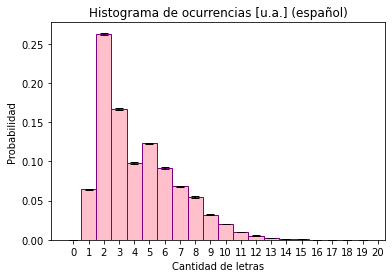

In [3]:
fic = open('./La_Divina_Comedia_es.txt', "r") #abre el archivo

lines = []
for line in fic:
    lines.append(line)
fic.close()

N=len(lines)
    
#cuenta cuantas letras hay en cada palabra del texto y lo almacena en un array
longitudes = []
for j in range(N):
    longitud= [len(w)for w in word_tokenize(lines[j]) if w.isalpha()]
    for i in longitud:
        longitudes.append(i)
        
#Plotea un histograma con la probabilidad con la que aparecen palabras con cierto número de letras en todo el texto
bins = np.arange(0,21,1)
h,b = np.histogram(longitudes,bins,density=True)
error = np.sqrt(h/len(longitudes))
plt.bar(b[:-1],height=h,width =1,color='pink',edgecolor='purple',yerr=error,capsize=4)
plt.title('Histograma de ocurrencias [u.a.] (español)')
plt.xlabel('Cantidad de letras')
plt.ylabel('Probabilidad')
plt.xticks(bins)
plt.savefig('Histograma de ocurrencias [u.a.] (español).png',dpi=300)
plt.show()


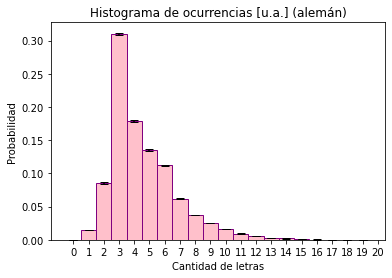

In [4]:
#Hago lo mismo para el alemán

fic = open('./La_Divina_Comedia_al.txt', "r") #abre el archivo

lines = []
for line in fic:
    lines.append(line)
fic.close()

N=len(lines)
    
#cuenta cuantas letras hay en cada palabra del texto y lo almacena en un array
longitudes = []
for j in range(N):
    longitud= [len(w)for w in word_tokenize(lines[j]) if w.isalpha()]
    for i in longitud:
        longitudes.append(i)
        
#Plotea un histograma con la probabilidad con la que aparecen palabras con cierto número de letras en todo el texto
bins = np.arange(0,21,1)
h,b = np.histogram(longitudes,bins,density=True)
error = np.sqrt(h/len(longitudes))
plt.bar(b[:-1],height=h,width =1,color='pink',edgecolor='purple',yerr=error,capsize=4)
plt.title('Histograma de ocurrencias [u.a.] (alemán)')
plt.xlabel('Cantidad de letras')
plt.ylabel('Probabilidad')
plt.xticks(bins)
plt.savefig('Histograma de ocurrencias [u.a.] (alemán).png',dpi=300)
plt.show()

<b>(1)</b> 

Cálculamos la distribución para el estadístico $t_1$ para el texto en español llamando a la función anteriormente definida que nos da la distribución. Este estadístico da cuenta del número de letras que tiene una palabra máximo en un conjunto de 1 palabra (en este caso es absurdo verlo así pero más adelante tendrá sentido). Esta función toma como input el texto en cuestión, la cantidad de palabras que queremos que compare la cantidad de letras que tiene cada una, en este caso será de 1; y por último la cantidad de veces que queremos que repita este proceso, en este caso elegimos 1000 ya que es un número razonable para armar el estadístico.

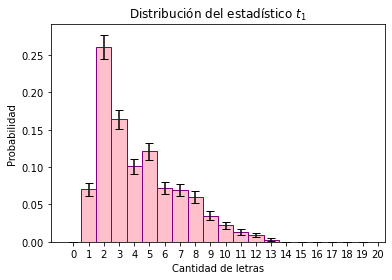

In [5]:
t1_es= Palabras('./La_Divina_Comedia_es.txt',1,1000)#llamamos a la función que nos da el estadítico

Calculamos la moda, media y mediana; facilmente utilizando funciones de numpy.

In [6]:
Moda_t1_es= np.argmax(t1_es[1]) #toma como input las alturas del histograma

Media_t1_es = np.mean(t1_es[0]) #toma como input el array de K palabras con máximo de letras entre un conjunto de n.

Mediana_t1_es = np.median(t1_es[0]) #toma como input el array de K palabras con máximo de letras entre un conjunto de n.

display(Markdown("Español (t1): <br> $Media=$ "+str(Media_t1_es)+"<br> $Moda = $ "+str(Moda_t1_es)+"<br> $Mediana =$ " +str(Mediana_t1_es)))

Español (t1): <br> $Media=$ 4.313<br> $Moda = $ 2<br> $Mediana =$ 4.0

Ahora repetimos el proceso pero para el texto en alemán.

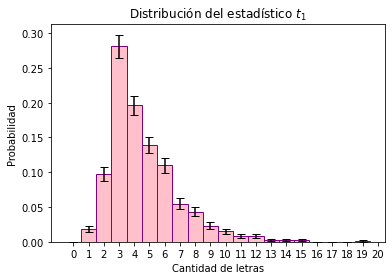

In [7]:
t1_al= Palabras('./La_Divina_Comedia_al.txt',1,1000) #llamamos a la función para el texto en alemán.

Calculamos su media, moda y mediana.

In [8]:
Moda_t1_al= np.argmax(t1_al[1])

Media_t1_al = np.mean(t1_al[0])

Mediana_t1_al = np.median(t1_al[0])

display(Markdown("Español (t1): <br> $Media=$ "+str(Media_t1_al)+"<br> $Moda = $ "+str(Moda_t1_al)+"<br> $Mediana =$ " +str(Mediana_t1_al)))

Español (t1): <br> $Media=$ 4.568<br> $Moda = $ 3<br> $Mediana =$ 4.0

<b> (2)</b>

Ahora hacemos la distribución del estadístico $t_{20}$ para ambos idiomas. Este estadístico es parecido al anterior, solo que ahora da cuenta de la cantidad de letras máxima que tiene una palabra en un conjunto de 20 palabras. Nuevamente realizamos 1000 repeticiones para armar el estadístico.

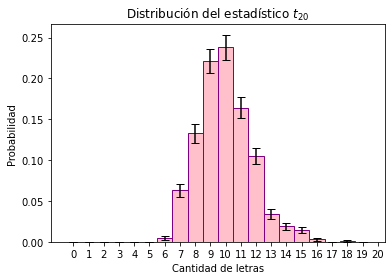

In [9]:
t20_es=Palabras('./La_Divina_Comedia_es.txt',20,1000)

Calculamos la media, moda y mediana.

In [10]:
Moda_t20_es= np.argmax(t20_es[1])

Media_t20_es = np.mean(t20_es[0])

Mediana_t20_es = np.median(t20_es[0])

display(Markdown("Español (t20): <br> $Media=$ "+str(Media_t20_es)+"<br> $Moda = $ "+str(Moda_t20_es)+"<br> $Mediana =$ " +str(Mediana_t20_es)))

Español (t20): <br> $Media=$ 9.952<br> $Moda = $ 10<br> $Mediana =$ 10.0

Realizamos todo análogamente para el texto en alemán.

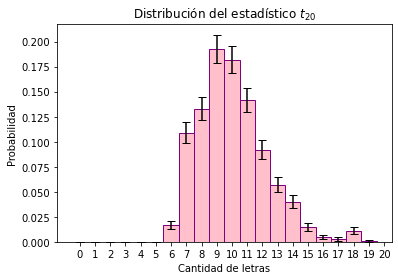

In [11]:
t20_al=Palabras('./La_Divina_Comedia_al.txt',20,1000)

In [12]:
Moda_t20_al= np.argmax(t20_al[1])

Media_t20_al = np.mean(t20_al[0])

Mediana_t20_al = np.median(t20_al[0])

display(Markdown("Aleman (t20): <br> $Media=$ "+str(Media_t20_al)+"<br> $Moda = $ "+str(Moda_t20_al)+"<br> $Mediana =$ " +str(Mediana_t20_al)))

Aleman (t20): <br> $Media=$ 10.026<br> $Moda = $ 9<br> $Mediana =$ 10.0

<b> (3) </b>

Calculamos el valor crítico de letras para el cual $\alpha \leq 0.05$. Queremos saber el valor del estadístico $t$ para el cuál la integral de la distribución desde ese valor en adelante de menor a $\alpha$. Debido a que nuestra distribución en este caso es discreta, esto no será más que sumar las alturas de los bins desde el valor crítico en adelante. 

Entonces para ello recorremos el array de las alturas del histograma en cuestión (que es uno de los elementos que nos devuelve la función Palabras anteriormente definida) y buscamos el número de elemento para el cual la suma alturas desde allí en adelante cumpla la condición pedida.

In [13]:
for i in range(len(t20_es[1])): #recorremos el array de alturas de la distribución
    alpha=np.sum(t20_es[1][i:]) #Sumamos desde el elemento i-esimo en adelante.
    if alpha<=0.05: #imponemos la condición de forma tal que cuando se cumpla, nos devuelva el primer número de elemento que la cumple
        Tc=i
        break
display(Markdown("Tenemos entonces que el valor de $t_{20}$ crítico <br> $t_c=$ "+str(Tc)+"<br> Y el valor para $\\alpha$ <br> $\\alpha=$ "+str(round(alpha,3))))

Tenemos entonces que el valor de $t_{20}$ crítico <br> $t_c=$ 14<br> Y el valor para $\alpha$ <br> $\alpha=$ 0.037

<b> (4) </b>

Calculamos la potencia para $t_{20}$. Para ello integramos (o sumamos en este caso) desde el valor de $t_{crítico}$ hallado anteriormente pero esta vez lo realizamos en la distribución para la hipotesis alternativa, es decir, utilizamos la distribución del estadístico para el libro en alemán.

In [14]:
#Calculamos la potencia sumando los terminos desde el tc calculado anteriormente para la distribucion de t1 en alemán
Potencia_t20=np.sum(t20_al[1][Tc:])
display(Markdown("Tenemos la potencia medida desde $t_c =$ "+str(Tc)+" para el estadistico $t_{20}$<br> $P_{t_{20}}=$ "+str(round(Potencia_t20,3))))

Tenemos la potencia medida desde $t_c =$ 14 para el estadistico $t_{20}$<br> $P_{t_{20}}=$ 0.075

Ahora si tomamos a $t_1$ como estadístico, calculamos el valor crítico.

In [15]:
for i in range(len(t1_es[1])): #recorremos el array de alturas de la distribución
    alpha_1=np.sum(t1_es[1][i:]) #Sumamos desde el elemento i-esimo en adelante.
    if alpha_1<=0.05: #imponemos la condición de forma tal que cuando se cumpla, nos devuelva el primer número de elemento que la cumple
        Tc_1=i
        break
display(Markdown("Tenemos entonces que el valor de $t_{1}$ crítico <br> $t_c=$ "+str(Tc_1)+"<br> Y el valor para $\\alpha$ <br> $\\alpha=$ "+str(round(alpha_1,3))))

Tenemos entonces que el valor de $t_{1}$ crítico <br> $t_c=$ 10<br> Y el valor para $\alpha$ <br> $\alpha=$ 0.047

In [16]:
Potencia_t1=np.sum(t1_al[1][Tc_1:])
display(Markdown("Tenemos la potencia medida desde $t_c =$ "+str(Tc_1)+" para el estadistico $t_1$<br> $P_{t_1}=$ "+str(round(Potencia_t1,3))))

Tenemos la potencia medida desde $t_c =$ 10 para el estadistico $t_1$<br> $P_{t_1}=$ 0.038

Nos piden también calcular la potencia para el estadístico $t_{100}$, entonces calculamos las distribuciones de $t_{100}$ para cada idioma.

Para el alemán

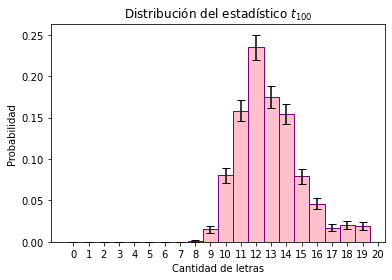

In [17]:
t100_al=Palabras('./La_Divina_Comedia_al.txt',100,1000)

Y para el español la distribución $t_{100}$ sería

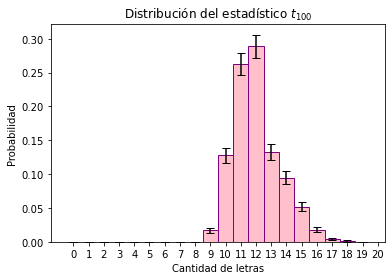

In [18]:
t100_es=Palabras('./La_Divina_Comedia_es.txt',100,1000)

Calculamos el $t_c$

In [19]:
for i in range(len(t100_es[1])): #recorremos el array de alturas de la distribución
    alpha_100=np.sum(t100_es[1][i:]) #Sumamos desde el elemento i-esimo en adelante.
    if alpha_100<=0.05: #imponemos la condición de forma tal que cuando se cumpla, nos devuelva el primer número de elemento que la cumple
        Tc_100=i
        break
display(Markdown("Tenemos entonces que el valor de $t_{1}$ crítico <br> $t_c=$ "+str(Tc_100)+"<br> Y el valor para $\\alpha$ <br> $\\alpha=$ "+str(round(alpha_100,3))))

Tenemos entonces que el valor de $t_{1}$ crítico <br> $t_c=$ 16<br> Y el valor para $\alpha$ <br> $\alpha=$ 0.023

Y con esto la potencia sería

In [20]:
Potencia_t100=np.sum(t100_al[1][Tc_100:])
display(Markdown("Y por último la potencia medida desde $t_c =$ "+str(Tc_100)+" para el estadistico $t_{100}$<br> $P_{t_{100}}=$ "+str(round(Potencia_t100,3))))

Y por último la potencia medida desde $t_c =$ 16 para el estadistico $t_{100}$<br> $P_{t_{100}}=$ 0.102

<b> (5) </b>

Realizamos un nuevo test para calcular el estadístico de rachas.

In [21]:
'''

Defino una función para el test de runs. Esta toma como imputs el texto en cuestión, n la cantidad de palabras que agarra, 
de las cuales elige la que posea el mayor número de letras y la almacena descartandolas otras n-1 palabras, K ahora no 
es el número de repeticiones de el proceso de descarte de palabras, si no que será el número de repeticiones para realizar 
el test de runs (ver si el valor de letras elegido entre los n valores cae de un lado u otro de la mediana de la 
distribución que queramos tratar), y además toma como imput a la mediana de la distribución en base a la cual queremos hacer
el test de runs. Es decir, esta función calcula el estadístico t_n y realiza el test propuesto en el ejercicio 5.

'''
def Runs(Text,n,K,Mediana):
    # fic = open('./text_es.txt', "r")
    fic = open(str(Text), "r")
    lines = []
    for line in fic:
        lines.append(line)
    fic.close()

    N=len(lines)

    longitudes = []
    for j in range(N):
        longitud = [len(w)for w in word_tokenize(lines[j]) if w.isalpha()]
        for i in longitud:
            longitudes.append(i)
    Rachas=[]
    # hasta acá hice lo mismo que para la función Palabras anteriormente definida
    
#############################################################################################################################    
    for j in range(K):  #ahora este for repite K veces la busqueda de la nueva variable aleatoria Rachas      
        maximos=[]
        for i in range(30):#fijo el número de palabras que agarramos por muestra en 30 
            temp=[]
            for o in range(n): #acá tomo n palabras y me fijo cual es el máximo de ellas, y lo guardo en el array maximos
                temp.append(random.choice(longitudes))
            maximos.append(max(temp))
        #Mediana = np.median(maximos)
#############################################################################################################################

        #ahora armo el criterio para obtener los valores para la variable rachas
        
        R=[]#me creo un array que guarda "los numeros de letras" que estén por encima o por debajo de la muestra
        #esto entonces agarra cada valor para la muestra de 30 palabras y si está por encima o por debajo de la mediana
        # si está por debajo agrega un 1 al array R, y por el contrario si está por debajo, agrega un 0.
        for p in range(len(maximos)): 
            if maximos[p]<Mediana:
                R.append(1)
            elif maximos[p]>Mediana:
                R.append(0)
        
        #ahora quiero contar las veces en las cuales los valores en la muestra saltan de un lado a otro de la mediana
        #para ello me creo un for que recorre el array R con los valores que están por debajo o por encima de la mediana
        # y se fija si el elemento es distinto al que le sigue. Si ese es el caso suma 1 a la variable g que será el número de rachas
        g=1
        for k in range(len(R)-1):
            if R[k] != R[k+1]:
                g=g+1
                
        #esto agrega el valor de rachas para la muestra en el array Rachas, con el fin de obtener K valores de Rachas.        
        Rachas.append(g)
    
    #Ploteo del histograma con las rachas
    Median=np.median(Rachas)    
    bins = np.arange(0,25,1)
    h,b = np.histogram(Rachas,bins,density=True)
    error = np.sqrt(h/len(Rachas))
    plt.bar(b[:-1],height=h,width =1,color='pink',edgecolor='purple',yerr=error,capsize=4)
    plt.title('Distribución del rachas')
    plt.xlabel('Rachas')
    plt.ylabel('Probabilidad')
    plt.xticks(bins)
    plt.savefig(str(Text)+'_Rachas_'+str(n)+'.png',dpi=300)
    plt.show()
    return h #me devuelve las alturas de los bins.

Distribución de rachas para el texto en alemán.

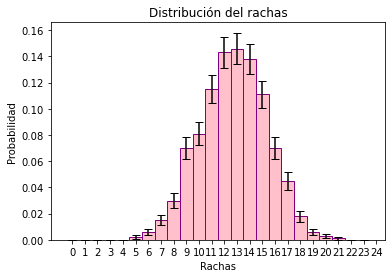

In [22]:
h_al=Runs('./La_Divina_Comedia_al.txt',1,1000,Mediana_t1_al)

Distribucion de rachas para el texto en español.

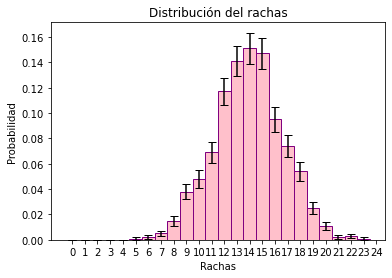

In [23]:
h_es=Runs('./La_Divina_Comedia_es.txt',1,1000,Mediana_t1_es)

<b> (6) </b>

Ahora tomo un libro de mi casa y agarro 30 palabras siguiendo el método propuesto en el parcial.

In [24]:
Muestra=[4,6,3,6,6,2,4,2,2,3,3,2,3,11,1,6,2,3,2,9,8,3,10,3,15,2,2,4,2,5]
np.median(Muestra)

#len(Muestra)

3.0

Realizamos el test para ver la cantidad de rachas que tiene la muestra

In [25]:

R=[]
for i in range(len(Muestra)):
    if Muestra[i]<Mediana_t1_al:
        R.append(1)
    elif Muestra[i]>Mediana_t1_al:
        R.append(0)
    g=1
    for k in range(len(R)-1):
        if R[k] != R[k+1]:
            g=g+1
display(Markdown("Rachas para la muestra = "+str(g)))

Rachas para la muestra = 15

Calculamos su P-valor integrando desde el valor medido en adelante para la distribución de rachas en alemán. Calculamos el nivel de confianza tomando como $\alpha = \text{p-valor}$

In [26]:
P_value=np.sum(h_al[g:])

CL = 1-P_value
display(Markdown("Tenemos que el p-valor es de <br> $P_{valor}=$ "+str(round(P_value,3))+"<br> y con esto aseguramos un nivel de confianza de que la hipotesis nula esté mal <br> $CL=$ "+str(round(CL*100,3))+"%"))

Tenemos que el p-valor es de <br> $P_{valor}=$ 0.254<br> y con esto aseguramos un nivel de confianza de que la hipotesis nula esté mal <br> $CL=$ 74.6%